In [ ]:
from pathlib import Path
import pyreadr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Ruta al archivo
rdata_path = Path("../data/raw/GSE183635_TEP_Count_Matrix.RData")

# Carga del archivo RData
result = pyreadr.read_r(rdata_path)

print("Objetos encontrados en el .RData:")
for name, obj in result.items():
    print(f"- {name}: {type(obj)}")

Objetos encontrados en el .RData:
- TEP_Count_Matrix: <class 'pandas.core.frame.DataFrame'>


In [ ]:
# Filtramos sólo dataframes
dfs = {name: obj for name, obj in result.items() if isinstance(obj, pd.DataFrame)}

if not dfs:
    raise ValueError("No se encontraron DataFrames en el RData. Revisa el contenido con print(result).")

# Elegimos el más grande (genes x muestras)
main_name, counts = max(
    dfs.items(),
    key=lambda kv: kv[1].shape[0] * kv[1].shape[1]
)

print(f"Usando '{main_name}' como matriz principal de conteos")
print("Shape:", counts.shape)
display(counts.head())

Usando 'TEP_Count_Matrix' como matriz principal de conteos
Shape: (5440, 2351)


,1-Vumc-HD-101-TR922,2-Vumc-HD-103-TR923,3-Vumc-HD-108-TR924,4-Vumc-HD-127-TR925,5-Vumc-HD-130-TR926,6-Vumc-HD-142-TR927,7-Vumc-HD-143-TR928,8-Vumc-HD-144-TR929,9-Vumc-HD-145-TR930,11-Vumc-HD-149-TR932,...,countMatrix.3502-NKI-4854-SARC-TR3080,countMatrix.3503-NKI-4707-SARC-TR3079,countMatrix.3504-NKI-4941-SARC-TR3084,countMatrix.3507-NKI-6348-SARC-TR3134,countMatrix.3508-NKI-5275-SARC-TR3099,countMatrix.3512-NKI-5148-SARC-TR3129,countMatrix.320-10,countMatrix.327-34,countMatrix.376-P-PH-001-013-TR1400,countMatrix.506-NKI-NSCLC-107-270
ENSG00000000419,5.0,79.0,58.0,128.0,93.0,12.0,0.0,0.0,18.0,28.0,...,3.0,0.0,1.0,2.0,9.0,16.0,22.0,21.0,0.0,1.0
ENSG00000000460,8.0,10.0,21.0,14.0,6.0,8.0,25.0,42.0,5.0,7.0,...,0.0,3.0,0.0,2.0,63.0,3.0,3.0,0.0,1.0,0.0
ENSG00000000938,24.0,336.0,334.0,59.0,120.0,22.0,31.0,13.0,19.0,36.0,...,8.0,45.0,1.0,7.0,163.0,90.0,46.0,75.0,14.0,8.0
ENSG00000001036,38.0,46.0,15.0,36.0,25.0,43.0,27.0,27.0,59.0,5.0,...,1.0,3.0,4.0,15.0,3.0,6.0,10.0,8.0,3.0,0.0
ENSG00000001461,72.0,17.0,11.0,9.0,18.0,28.0,5.0,6.0,49.0,18.0,...,1.0,1.0,0.0,0.0,12.0,2.0,6.0,6.0,1.0,0.0


In [ ]:
n_genes, n_samples = counts.shape
print(f"Número de genes:   {n_genes}")
print(f"Número de muestras:{n_samples}")

print("\nNúmero de NaNs:", counts.isna().sum().sum())

Número de genes:   5440
Número de muestras:2351

Número de NaNs: 0


In [ ]:
library_sizes = counts.sum(axis=0)  # suma por muestra

print("Resumen de library sizes (conteos totales por muestra):")
print(library_sizes.describe())

Resumen de library sizes (conteos totales por muestra):
count    2.351000e+03
mean     8.789214e+05
std      7.111697e+05
min      1.355500e+04
25%      3.375165e+05
50%      7.217050e+05
75%      1.236096e+06
max      8.000867e+06
dtype: float64


In [ ]:
gene_totals = counts.sum(axis=1)

print("Resumen de expresión total por gen:")
print(gene_totals.describe())

Resumen de expresión total por gen:
count    5.440000e+03
mean     3.798427e+05
std      2.293488e+06
min      1.404000e+04
25%      3.807525e+04
50%      7.155800e+04
75%      1.871775e+05
max      9.712683e+07
dtype: float64


In [ ]:
total_entries = counts.shape[0] * counts.shape[1]
zero_entries = (counts == 0).sum().sum()
frac_zeros = (zero_entries / total_entries) * 100

print(f"Total de entradas: {total_entries}")
print(f"Entradas a cero:   {zero_entries}")
print(f"Porcentaje de ceros: {frac_zeros:.3f} %")

Total de entradas: 12789440
Entradas a cero:   1134949
Porcentaje de ceros: 8.874 %


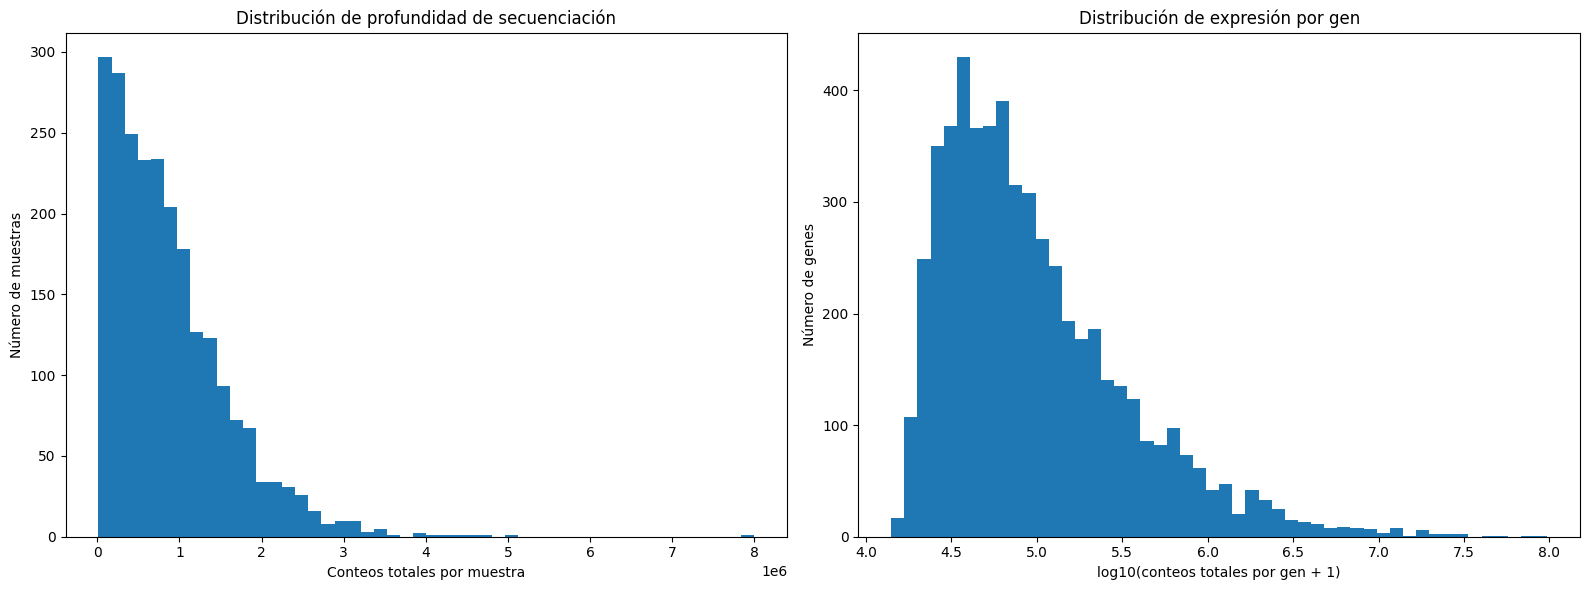

In [ ]:
# Histograma de tamaños de librería
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
library_sizes.plot(kind="hist", bins=50)
plt.xlabel("Conteos totales por muestra")
plt.ylabel("Número de muestras")
plt.title("Distribución de profundidad de secuenciación")
plt.tight_layout()

# Histograma de expresión total por gen (en log10 para que se vea algo)
plt.subplot(1,2,2)
np.log10(gene_totals + 1).plot(kind="hist", bins=50)
plt.xlabel("log10(conteos totales por gen + 1)")
plt.ylabel("Número de genes")
plt.title("Distribución de expresión por gen")
plt.tight_layout()
plt.show()